## 다중선형회귀분석

- #### CRIM, RM, LSTAT 세개 변수가  PRICE 에 영향을 주는지 확인
    - Boston 주택 가격데이터 이용 

In [9]:
import statsmodels.api as sm

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [19]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [22]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
boston_df["PRICE"]=pd.DataFrame(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [27]:
boston_df.shape

(506, 14)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
crim_price=boston_df[["CRIM","PRICE"]]
crim_price.head()

,CRIM,PRICE
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


In [47]:
rm_price=boston_df[["RM","PRICE"]]
rm_price.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [48]:
lstat_price=boston_df[["LSTAT","PRICE"]]
lstat_price.head()

,LSTAT,PRICE
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


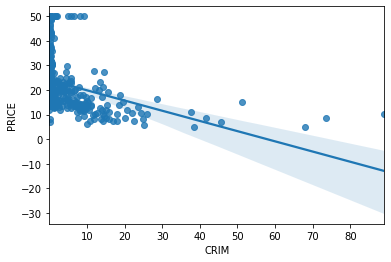

In [30]:
sns.regplot(x="CRIM",y="PRICE",data=crim_price)
plt.show()

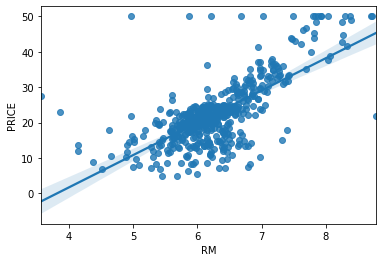

In [49]:
sns.regplot(x="RM",y="PRICE",data=rm_price)
plt.show()

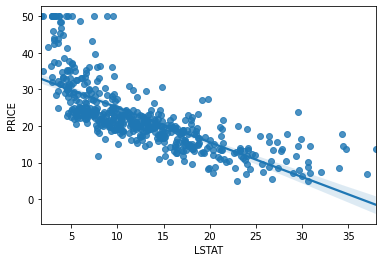

In [50]:
sns.regplot(x="LSTAT",y="PRICE",data=lstat_price)
plt.show()

- 선형회귀분석

In [52]:
price=boston_df[["PRICE"]]
crim=boston_df[["CRIM"]]
rm=boston_df[["RM"]]
lstat=boston_df[["LSTAT"]]

In [32]:
import statsmodels.api as sm

In [53]:
crim1=sm.add_constant(crim,has_constant='add')
rm1=sm.add_constant(rm,has_constant='add')
lstat1=sm.add_constant(lstat,has_constant='add')

In [35]:
reg=sm.OLS(price,crim1)
fitted_model=reg.fit()

In [36]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.17e-19
Time:                        14:28:55   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y_hat=bete0+beta1*X(회귀식) 계산

In [37]:
fitted_model.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [38]:
np.dot(crim1,fitted_model.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [40]:
pred=fitted_model.predict(crim1)
pred

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [42]:
pred-np.dot(crim1,fitted_model.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

- #### 시각화

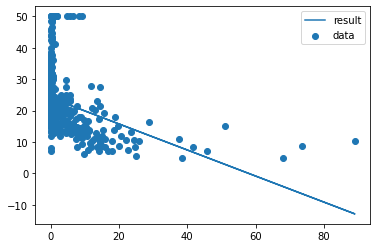

In [44]:
import matplotlib.pyplot as plt
plt.scatter(crim,price,label="data")
plt.plot(crim,pred,label="result")
plt.legend()
plt.show()

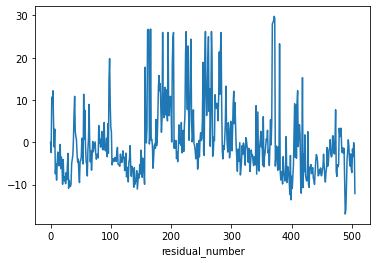

In [45]:
fitted_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [46]:
sum(fitted_model.resid)

-3.693045869113121e-12

## ===== 과제 ======

### RM

In [54]:
reg=sm.OLS(price,rm1)
fitted_model=reg.fit()

In [55]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.49e-74
Time:                        14:38:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
fitted_model.params

const   -34.670621
RM        9.102109
dtype: float64

In [58]:
np.dot(rm1,fitted_model.params)

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [59]:
pred=fitted_model.predict(rm1)
pred

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [60]:
pred-np.dot(rm1,fitted_model.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

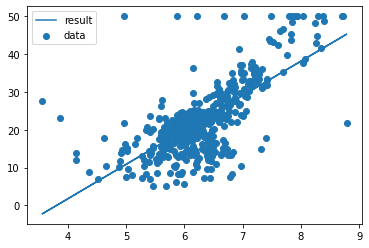

In [61]:
import matplotlib.pyplot as plt
plt.scatter(rm,price,label="data")
plt.plot(rm,pred,label="result")
plt.legend()
plt.show()

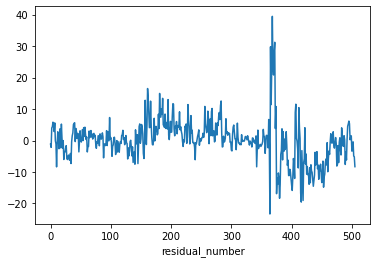

In [62]:
fitted_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [63]:
sum(fitted_model.resid)

1.1462830684649816e-11

### LSTAT

In [65]:
reg=sm.OLS(price,lstat1)
fitted_model=reg.fit()

In [66]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        14:40:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
fitted_model.params

const    34.553841
LSTAT    -0.950049
dtype: float64

In [69]:
np.dot(lstat1,fitted_model.params)

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693,
       15.1253316 , 21.94668596, 19.62856553, 26.70643322, 24.80633451,
       26.50692285, 28.30251613, 20.61661686, 23.44776393, 23.83728417,
       14.58380346, 21.41465832, 16.76891698, 15.66685973, 19.06803641,
       18.86852605, 20.48360995, 18.13698805, 22.39320915, 23.17224962,
       13.08272548, 22.16519731,  8.22797329, 17.12043524, 15.22983702,
       25.35736314, 23.71377775, 26.22190805, 24.92984093, 30.44962767,
       32.67274316, 29.95560201, 29.03405413, 27.48547369, 25.48086955,
       24.85383698, 21.11064252, 16.69291303,  5.28282029, 19.16304135,
       21.77567707, 25.59487547, 29.53758029, 26.54492483, 20.49311044,
       29.98410349, 29.07205611, 30.80114593, 28.03650231, 25.79438584,
       22.06069188, 20.83512821, 28.16000873, 25.52837202, 26.90594358,
       30.1171104 , 24.8253355 , 26.85844111, 22.11769484, 26.20

In [70]:
pred=fitted_model.predict(lstat1)
pred

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

In [71]:
pred-np.dot(lstat1,fitted_model.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

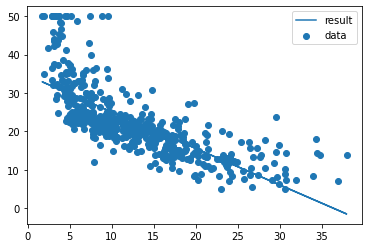

In [72]:
import matplotlib.pyplot as plt
plt.scatter(lstat,price,label="data")
plt.plot(lstat,pred,label="result")
plt.legend()
plt.show()

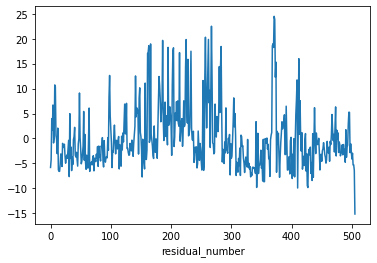

In [73]:
fitted_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [74]:
sum(fitted_model.resid)

1.3484324767887301e-11

In [75]:
x_data=boston_df[["CRIM","RM","LSTAT"]]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [76]:
price=boston_df[["PRICE"]]

In [77]:
x_data1=sm.add_constant(x_data,has_constant='add')

In [78]:
multi_model=sm.OLS(price,x_data1)
fitted_multi_model=multi_model.fit()

In [79]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        14:45:03   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


<AxesSubplot:>

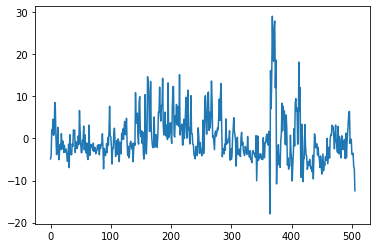

In [82]:
fitted_multi_model.resid.plot()

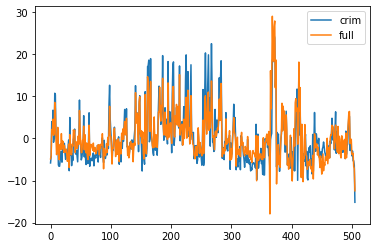

In [86]:
fitted_model.resid.plot(label="crim")
fitted_multi_model.resid.plot(label="full")
plt.legend()

- #### 상관계수/산점도를 통해 다중공선성 확인

In [87]:
x_data.corr()

,CRIM,RM,LSTAT
CRIM,1.000000,-0.219247,0.455621
RM,-0.219247,1.000000,-0.613808
LSTAT,0.455621,-0.613808,1.000000


In [88]:
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


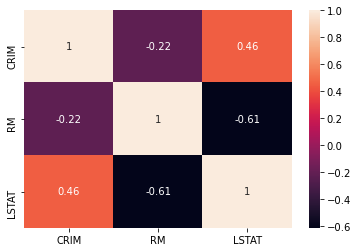

In [92]:
sns.heatmap(x_data.corr(),annot=True)
plt.show()

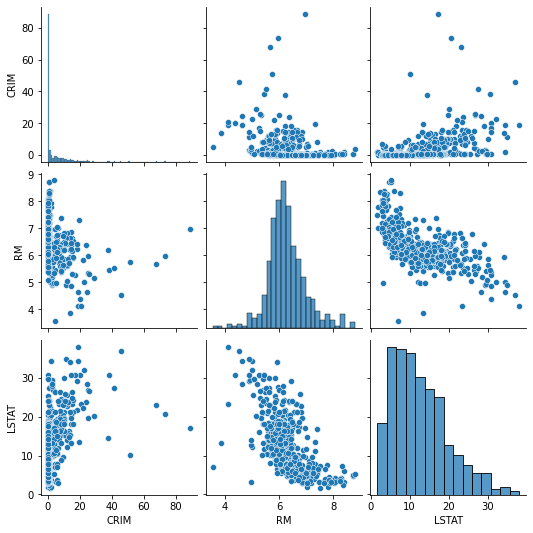

In [91]:
sns.pairplot(x_data)
plt.show()

- #### VIF를 통한 다중공선성 확인

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x_data.values,i) for i in range(x_data.shape[1])]
vif["features"]=x_data.columns
vif

,VIF Factor,features
0,1.475257,CRIM
1,3.379490,RM
2,4.167763,LSTAT


In [95]:
vif=pd.DataFrame()
x_data2=x_data.drop('LSTAT',axis=1)
vif["VIF Factor"]=[variance_inflation_factor(x_data2.values,i) for i in range(x_data2.shape[1])]
vif["features"]=x_data2.columns
vif

,VIF Factor,features
0,1.151584,CRIM
1,1.151584,RM


In [97]:
x_data3=sm.add_constant(x_data2,has_constant='add')
model_vif=sm.OLS(price,x_data2)
fitted_model_vif=model_vif.fit()

In [98]:
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              2826.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                   1.31e-274
Time:                        14:53:11   Log-Likelihood:                         -1699.9
No. Observations:                 506   AIC:                                      3404.
Df Residuals:                     504   BIC:                                      3412.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.3627      0.036    -10.159      0.000      -0.433      -0.293
RM             3.8473      0.053     73.098      0.000       3.744       3.951
==============================================================================
Omnibus:                      148.501   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.997
Skew:                           1.453   Prob(JB):                     2.06e-85
Kurtosis:                       6.171   Cond. No.                         1.73
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        14:53:24   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### 학습 / 검증데이터 분할

In [101]:
from sklearn.model_selection import train_test_split
X=x_data
y=price
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=102)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [102]:
x_train2=sm.add_constant(x_train,has_constant='add')
fit_1=sm.OLS(y_train,x_train2)
fit_1=fit_1.fit()

In [103]:
x_test2=sm.add_constant(x_test,has_constant='add')

fit_1.predict(x_test2)

404     5.439925
302    26.379176
465    18.944288
278    27.196242
295    28.757754
         ...    
8       9.191039
459    19.858532
165    23.326341
461    21.778478
476    19.799286
Length: 152, dtype: float64

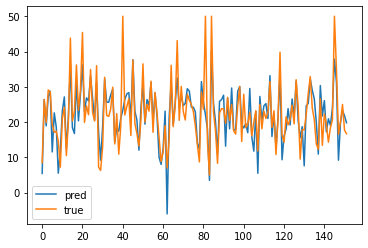

In [104]:
plt.plot(np.array(fit_1.predict(x_test2)),label="pred")
plt.plot(np.array(y_test),label="true")
plt.legend()
plt.show()

In [106]:
X=x_data2
y=price
x2_train,x2_test,y2_train,y2_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=102)
print(x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape)

(354, 2) (152, 2) (354, 1) (152, 1)


In [107]:
x2_train2=sm.add_constant(x2_train,has_constant='add')
fit_2=sm.OLS(y2_train,x2_train2)
fit_2=fit_2.fit()

In [108]:
x2_test2=sm.add_constant(x2_test,has_constant='add')

fit_2.predict(x2_test2)

404     5.537959
302    25.261119
465    18.277471
278    25.156740
295    26.771339
         ...    
8      18.048453
459    19.924780
165    21.186945
461    23.254565
476    23.818882
Length: 152, dtype: float64

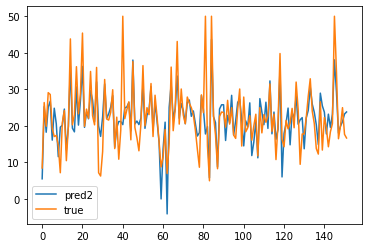

In [109]:
plt.plot(np.array(fit_2.predict(x2_test2)),label="pred2")
plt.plot(np.array(y2_test),label="true")
plt.legend()
plt.show()

- #### MSE를 통한 검증데이터에 대한 성능비교

In [105]:
from sklearn.metrics import mean_squared_error

In [110]:
mean_squared_error(y_true=y_test['PRICE'],y_pred=fit_1.predict(x_test2))

28.052043899506305

In [111]:
mean_squared_error(y_true=y2_test['PRICE'],y_pred=fit_2.predict(x2_test2))

34.729785078939436

### 사이킷런으로 회귀분석

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=x_data
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
y_pred=lr.predict(x_test)

In [124]:
y_pred

array([[ 5.43992518],
       [26.37917636],
       [18.94428761],
       [27.19624222],
       [28.7577541 ],
       [11.54320186],
       [22.60382108],
       [18.56894956],
       [ 5.5189754 ],
       [11.83167992],
       [23.13446345],
       [27.13803424],
       [12.31630087],
       [21.34604968],
       [36.30714108],
       [18.43268868],
       [16.75470946],
       [31.76210091],
       [20.34310735],
       [27.90833785],
       [36.19906964],
       [23.0030261 ],
       [26.86862663],
       [25.96625858],
       [33.1261359 ],
       [26.63207448],
       [20.48925033],
       [31.19211744],
       [17.01086054],
       [ 9.19879965],
       [18.76990631],
       [32.16141671],
       [25.62685655],
       [25.62862505],
       [27.68600476],
       [29.32264526],
       [14.26393235],
       [18.39887075],
       [17.41832321],
       [21.10665804],
       [23.36515342],
       [26.43292936],
       [27.98500278],
       [28.36152478],
       [20.5678498 ],
       [37

In [125]:
mse=mean_squared_error(y_test,y_pred)
mse

28.05204389950629

In [126]:
r2=r2_score(y_test,y_pred)
r2

0.6355016044016516

In [127]:
print("절편(베타0): ",lr.intercept_)
print("회귀계수: ",lr.coef_)

절편(베타0):  [-2.1790669]
회귀계수:  [[-0.11503944  5.19512234 -0.5967032 ]]


In [128]:
coeff=pd.DataFrame(lr.coef_.T,index=X.columns,columns=["coeff"])
coeff

,coeff
CRIM,-0.115039
RM,5.195122
LSTAT,-0.596703
